In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
df = pd.read_csv('dataImages2.csv', sep=',')

In [87]:
df.columns

Index(['Unnamed: 0', 'NameImage', 'centroid-0', 'centroid-1', 'orientation',
       'axis_major_length', 'axis_minor_length', 'bbox-0', 'bbox-1', 'bbox-2',
       'bbox-3', 'AOL'],
      dtype='object')

In [88]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('NameImage', axis=1)
# df = df.drop('PESOABATE', axis=1)
# df = df.drop('RC', axis=1)
# df = df.drop('CP', axis=1)
# # df = df.drop('AOL', axis=1)
# df = df.drop('POL', axis=1)
# df = df.drop('COL', axis=1)
# df = df.drop('EGS', axis=1)
# df = df.drop('ECC', axis=1)
# df = df.drop('FAMACHA', axis=1)
# df = df.drop('CC', axis=1)
# df = df.drop('AG', axis=1)
# df = df.drop('AC', axis=1)
# df = df.drop('AP', axis=1)
# df = df.drop('CT', axis=1)
# df = df.drop('PESOVIVO', axis=1)
# df = df.drop('Profund', axis=1)

df

,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length,bbox-0,bbox-1,bbox-2,bbox-3,AOL
0,680.628513,1292.731301,1.185020,668.454826,285.965281,490,950,904,1563,"7,92"
1,647.525834,1056.260572,1.229996,598.819443,271.271107,485,736,866,1312,"6,49"
2,762.059051,964.658501,1.071199,813.456394,322.572070,513,577,1063,1318,"7,32"
3,572.263991,925.967098,1.051760,583.956908,246.906508,387,643,812,1137,"7,27"
4,606.055707,916.184458,1.178800,678.511688,288.963727,425,572,907,1183,"8,12"
5,702.059787,1426.711346,1.049927,780.933016,317.465241,438,1052,1043,1745,"10,13"
6,615.209648,566.580263,1.125802,626.655174,211.396859,447,261,826,850,"7,83"
7,663.807650,1118.488057,1.115004,712.900538,290.068759,433,784,948,1412,"9,56"
8,634.201960,907.697296,1.259028,689.596769,307.124922,500,539,927,1168,"8,5"
9,705.656379,1366.666840,1.173165,705.392407,270.444547,501,1017,936,1654,"6,62"


In [89]:
# Tratar os floats que foram inseridos com virgula ao inves de ponto.

def replaceFloat(nameColumns):
    aux = [float(str(x).replace(',', '.')) for x in df[nameColumns]]
    return aux

for x in df:
    df[x] = replaceFloat(x)

df

,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length,bbox-0,bbox-1,bbox-2,bbox-3,AOL
0,680.628513,1292.731301,1.185020,668.454826,285.965281,490.0,950.0,904.0,1563.0,7.92
1,647.525834,1056.260572,1.229996,598.819443,271.271107,485.0,736.0,866.0,1312.0,6.49
2,762.059051,964.658501,1.071199,813.456394,322.572070,513.0,577.0,1063.0,1318.0,7.32
3,572.263991,925.967098,1.051760,583.956908,246.906508,387.0,643.0,812.0,1137.0,7.27
4,606.055707,916.184458,1.178800,678.511688,288.963727,425.0,572.0,907.0,1183.0,8.12
5,702.059787,1426.711346,1.049927,780.933016,317.465241,438.0,1052.0,1043.0,1745.0,10.13
6,615.209648,566.580263,1.125802,626.655174,211.396859,447.0,261.0,826.0,850.0,7.83
7,663.807650,1118.488057,1.115004,712.900538,290.068759,433.0,784.0,948.0,1412.0,9.56
8,634.201960,907.697296,1.259028,689.596769,307.124922,500.0,539.0,927.0,1168.0,8.50
9,705.656379,1366.666840,1.173165,705.392407,270.444547,501.0,1017.0,936.0,1654.0,6.62


### Ver os valores null

<AxesSubplot:>

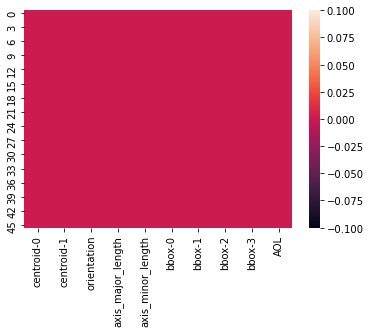

In [90]:
sns.heatmap(df.isnull())

In [91]:
df.isnull().sum() #check for missing values

centroid-0           0
centroid-1           0
orientation          0
axis_major_length    0
axis_minor_length    0
bbox-0               0
bbox-1               0
bbox-2               0
bbox-3               0
AOL                  0
dtype: int64

### Treinando o modelo

In [92]:
X = df.drop('AOL', axis=1)
y = df['AOL']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [94]:
# Fit the model
model = LinearRegression()
model = model.fit(X_train, y_train)

In [95]:
importance = model.coef_

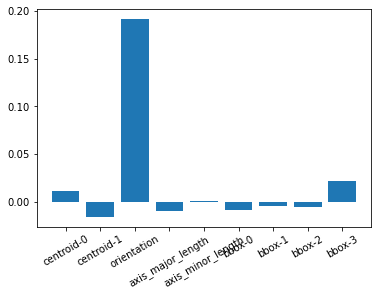

In [96]:
#histogram
plt.bar([x for x in range (len(importance))], importance)
plt.xticks([x for x in range (len(importance))], X.columns.values.tolist(), rotation=30)
plt.show()

In [97]:
y_test_predict = model.predict(X_test)

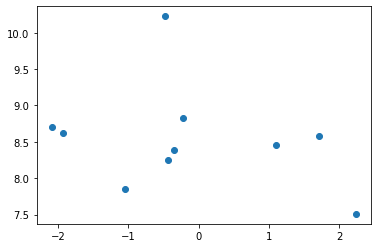

In [98]:
plt.scatter(y_test-y_test_predict,y_test_predict)
plt.show()

### Result

In [99]:
# model evaluation for training set
y_train_predict = model.predict(X_train)

rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)

print(f"RMSE for training is {rmse_train}")
print(f"R2 score for training is {r2_train}")

RMSE for training is 1.1793171038552102
R2 score for training is 0.20418222327422897


In [100]:
# model evaluation for training set
y_test_predict = model.predict(X_test)

rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)

print(f"RMSE for testing is {rmse_test}")
print(f"R2 score for testing is {r2_test}")

RMSE for testing is 1.3746448811927938
R2 score for testing is -0.06846670789955778


In [101]:
print(model.intercept_)

8.074127087148494


In [102]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
centroid-0,0.010810
centroid-1,-0.015897
orientation,0.191399
axis_major_length,-0.010194
axis_minor_length,0.000430
bbox-0,-0.009039
bbox-1,-0.004640
bbox-2,-0.005709
bbox-3,0.021867


In [103]:
y_pred = model.predict(X_test)

In [104]:
df_aux = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_aux

,Actual,Predicted
23,9.75,10.225736
37,8.61,8.827125
15,10.30,8.586306
6,7.83,8.256603
13,9.75,7.509382
7,9.56,8.454047
19,6.70,8.624082
9,6.62,8.705128
29,8.04,8.388027
44,6.81,7.853939


In [105]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1580904312516842
Mean Squared Error: 1.88964854938955
Root Mean Squared Error: 1.3746448811927938
